In [15]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
%matplotlib inline

### 1. 读取数据并可视化地震数据的折线图

[7.8 5.  5.4 ... 5.7 5.2 5.8]
1549


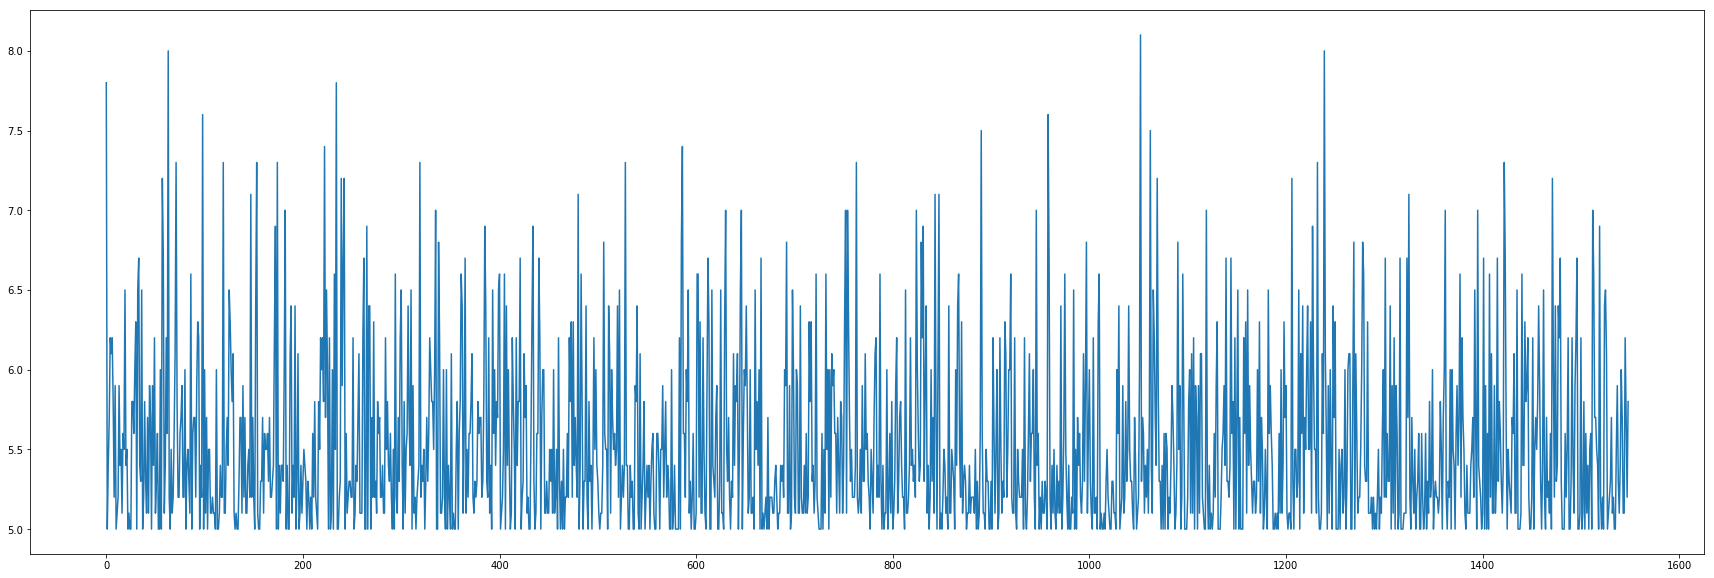

In [16]:
import matplotlib.pyplot as plt
from pandas import read_csv

# 载入数据
df = read_csv('./data/eq_date.csv', usecols=[1])
dataset  = df['震级'].values
print(dataset)
print(len(dataset))


plt.figure(figsize=(30,10))
plt.plot(dataset)
plt.show()

### 2. 数据转化
- 采用时间窗方法划分数据，以使得时序预测问题可转换为传统的监督学习问题
- 转化为LSTM指定格式 [samples, time steps, features]

In [17]:
# 自定义多步预测的数据划分方法
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # 序列的结尾index
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # 检查是否越界
        if out_end_ix > len(sequence):
            break
        # 划分输入序列-X，输出序列-y
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [18]:
# 选择时间窗口（输入步长，输出步长）
n_steps_in, n_steps_out = 30, 5

In [19]:
# 数据划分
X, y = split_sequence(dataset, n_steps_in, n_steps_out)

In [20]:
print(X)
print(X.shape) 

[[7.8 5.  5.4 ... 5.8 5.6 6. ]
 [5.  5.4 5.7 ... 5.6 6.  6.3]
 [5.4 5.7 6.2 ... 6.  6.3 5. ]
 ...
 [7.  6.6 5.7 ... 5.1 5.4 6. ]
 [6.6 5.7 5.7 ... 5.4 6.  5.7]
 [5.7 5.7 5.5 ... 6.  5.7 5.1]]
(1515, 30)


In [21]:
print(y)
print(y.shape)

[[6.3 5.  6.5 6.7 5.4]
 [5.  6.5 6.7 5.4 5.3]
 [6.5 6.7 5.4 5.3 6.5]
 ...
 [5.7 5.1 5.1 6.2 5.7]
 [5.1 5.1 6.2 5.7 5.2]
 [5.1 6.2 5.7 5.2 5.8]]
(1515, 5)


In [22]:
# 数据转化为LSTM指定格式 （样本个数，时间窗大小，输入的维度）
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### 3. 构建Stacked LSTM模型进行多步预测

In [23]:
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [24]:
# 模型训练
model.fit(X, y, epochs=1000,batch_size=50, verbose=2)

Epoch 1/1000
1s - loss: 8.1186
Epoch 2/1000
1s - loss: 0.3890
Epoch 3/1000
1s - loss: 0.3415
Epoch 4/1000
1s - loss: 0.3359
Epoch 5/1000
1s - loss: 0.3331
Epoch 6/1000
1s - loss: 0.3290
Epoch 7/1000
1s - loss: 0.3230
Epoch 8/1000
1s - loss: 0.3314
Epoch 9/1000
1s - loss: 0.3268
Epoch 10/1000
1s - loss: 0.3248
Epoch 11/1000
1s - loss: 0.3284
Epoch 12/1000
1s - loss: 0.3308
Epoch 13/1000
1s - loss: 0.3260
Epoch 14/1000
1s - loss: 0.3231
Epoch 15/1000
1s - loss: 0.3234
Epoch 16/1000
1s - loss: 0.3234
Epoch 17/1000
1s - loss: 0.3191
Epoch 18/1000
1s - loss: 0.3178
Epoch 19/1000
1s - loss: 0.3185
Epoch 20/1000
1s - loss: 0.3188
Epoch 21/1000
1s - loss: 0.3171
Epoch 22/1000
1s - loss: 0.3172
Epoch 23/1000
1s - loss: 0.3149
Epoch 24/1000
1s - loss: 0.3185
Epoch 25/1000
1s - loss: 0.3227
Epoch 26/1000
1s - loss: 0.3253
Epoch 27/1000
1s - loss: 0.3252
Epoch 28/1000
1s - loss: 0.3169
Epoch 29/1000
1s - loss: 0.3255
Epoch 30/1000
1s - loss: 0.3203
Epoch 31/1000
1s - loss: 0.3184
Epoch 32/1000
1s 

1s - loss: 0.3140
Epoch 254/1000
1s - loss: 0.3136
Epoch 255/1000
1s - loss: 0.3120
Epoch 256/1000
1s - loss: 0.3132
Epoch 257/1000
1s - loss: 0.3112
Epoch 258/1000
1s - loss: 0.3131
Epoch 259/1000
1s - loss: 0.3109
Epoch 260/1000
1s - loss: 0.3103
Epoch 261/1000
1s - loss: 0.3113
Epoch 262/1000
1s - loss: 0.3101
Epoch 263/1000
1s - loss: 0.3113
Epoch 264/1000
1s - loss: 0.3103
Epoch 265/1000
1s - loss: 0.3121
Epoch 266/1000
1s - loss: 0.3144
Epoch 267/1000
1s - loss: 0.3104
Epoch 268/1000
1s - loss: 0.3097
Epoch 269/1000
1s - loss: 0.3157
Epoch 270/1000
1s - loss: 0.3125
Epoch 271/1000
1s - loss: 0.3111
Epoch 272/1000
1s - loss: 0.3091
Epoch 273/1000
1s - loss: 0.3131
Epoch 274/1000
1s - loss: 0.3113
Epoch 275/1000
1s - loss: 0.3112
Epoch 276/1000
1s - loss: 0.3103
Epoch 277/1000
1s - loss: 0.3114
Epoch 278/1000
1s - loss: 0.3134
Epoch 279/1000
1s - loss: 0.3103
Epoch 280/1000
1s - loss: 0.3096
Epoch 281/1000
1s - loss: 0.3095
Epoch 282/1000
1s - loss: 0.3119
Epoch 283/1000
1s - loss:

1s - loss: 0.1478
Epoch 503/1000
1s - loss: 0.1545
Epoch 504/1000
1s - loss: 0.1496
Epoch 505/1000
1s - loss: 0.1430
Epoch 506/1000
1s - loss: 0.1432
Epoch 507/1000
1s - loss: 0.1409
Epoch 508/1000
1s - loss: 0.1391
Epoch 509/1000
1s - loss: 0.1458
Epoch 510/1000
1s - loss: 0.1413
Epoch 511/1000
1s - loss: 0.1392
Epoch 512/1000
1s - loss: 0.1338
Epoch 513/1000
1s - loss: 0.1362
Epoch 514/1000
1s - loss: 0.1370
Epoch 515/1000
1s - loss: 0.1356
Epoch 516/1000
1s - loss: 0.1378
Epoch 517/1000
1s - loss: 0.1263
Epoch 518/1000
1s - loss: 0.1293
Epoch 519/1000
1s - loss: 0.1411
Epoch 520/1000
1s - loss: 0.1292
Epoch 521/1000
1s - loss: 0.1300
Epoch 522/1000
1s - loss: 0.1253
Epoch 523/1000
1s - loss: 0.1253
Epoch 524/1000
1s - loss: 0.1259
Epoch 525/1000
1s - loss: 0.1291
Epoch 526/1000
1s - loss: 0.1210
Epoch 527/1000
1s - loss: 0.1185
Epoch 528/1000
1s - loss: 0.1173
Epoch 529/1000
1s - loss: 0.1162
Epoch 530/1000
1s - loss: 0.1218
Epoch 531/1000
1s - loss: 0.1219
Epoch 532/1000
1s - loss:

1s - loss: 0.0296
Epoch 752/1000
1s - loss: 0.0232
Epoch 753/1000
1s - loss: 0.0231
Epoch 754/1000
1s - loss: 0.0269
Epoch 755/1000
1s - loss: 0.0239
Epoch 756/1000
1s - loss: 0.0230
Epoch 757/1000
1s - loss: 0.0219
Epoch 758/1000
1s - loss: 0.0204
Epoch 759/1000
1s - loss: 0.0194
Epoch 760/1000
1s - loss: 0.0185
Epoch 761/1000
1s - loss: 0.0209
Epoch 762/1000
1s - loss: 0.0204
Epoch 763/1000
1s - loss: 0.0192
Epoch 764/1000
1s - loss: 0.0213
Epoch 765/1000
1s - loss: 0.0265
Epoch 766/1000
1s - loss: 0.0245
Epoch 767/1000
1s - loss: 0.0202
Epoch 768/1000
1s - loss: 0.0187
Epoch 769/1000
1s - loss: 0.0187
Epoch 770/1000
1s - loss: 0.0180
Epoch 771/1000
1s - loss: 0.0177
Epoch 772/1000
1s - loss: 0.0182
Epoch 773/1000
1s - loss: 0.0181
Epoch 774/1000
1s - loss: 0.0196
Epoch 775/1000
1s - loss: 0.0217
Epoch 776/1000
1s - loss: 0.0237
Epoch 777/1000
1s - loss: 0.0213
Epoch 778/1000
1s - loss: 0.0197
Epoch 779/1000
1s - loss: 0.0181
Epoch 780/1000
1s - loss: 0.0178
Epoch 781/1000
1s - loss:

1s - loss: 0.0077


### 4. 模型预测

In [25]:
# 预测后5次地震震级
x_input = dataset[len(dataset)-n_steps_in:len(dataset)]
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[5.5887437 4.7606807 5.272875  5.3373528 5.6968775]]
